In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
import scipy.signal as signal
import numpy as np
%matplotlib inline

In [2]:
#First define some input parameters for the signal:
#
A = 2.
w = 1.
phi = 0.5 * np.pi
nin = 1000
nout = 1000
frac_points = 0.95 # Fraction of points to select

#Randomly select a fraction of an array with timesteps:
r = np.random.rand(nin)
xt = np.linspace(0.01, 20*np.pi, nin)
#print(len(x))
#dx=x[1]-x[0]
dx=(10.*np.pi-0.01)/(nin-1)
x = xt[r >= frac_points]
print(x[len(x)-1],len(x),len(xt))

62.0772362180806 50 1000


In [3]:
#Plot a sine wave for the selected times:

y = A * np.sin(w*x+phi)

# Define the array of frequencies for which to compute the periodogram:
min_fraq=1./x[len(x)-1]
max_fraq=1./(2.*dx)
#f = np.linspace(0.01, 4., nout)
f = np.linspace(min_fraq, max_fraq, nout)

#Calculate Lomb-Scargle periodogram:
#pgram = signal.lombscargle(x, y, f, normalize=False)
pgram = signal.lombscargle(x, y, f)#,normalize=True)
print(len(f),len(pgram))

1000 1000


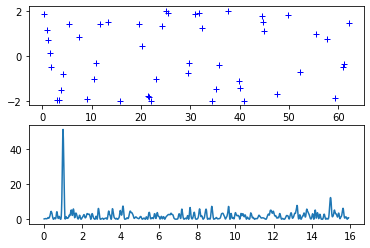

In [4]:
#Now make a plot of the input data:

plt.subplot(2, 1, 1)
plt.plot(x, y, 'b+')

#Then plot the normalized periodogram:

plt.subplot(2, 1, 2)
plt.plot(f, pgram)
plt.savefig("fig1.png")

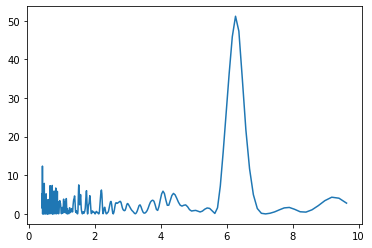

In [5]:
period=[]
period=2.*np.pi/f
#plt.plot(period,'x')
#plt.axis([4,8,0,1])
plt.plot(period[40:-40],pgram[40:-40])

## WINDOW LS transform

In [15]:
nx=len(x)
for i in range(nx-1):
    print(x[i+1]-x[i])

0.5659626402864493
0.25153895123842196
0.3144236890480274
0.3144236890480272
1.1948100183825041
0.3144236890480272
0.5030779024768437
0.4401931646672388
1.194810018382504
1.9494268720977699
1.6978879208593476
1.3205794940017146
0.377308426857633
0.9432710671440816
1.509233707430532
2.4525047745746136
3.8988537441955415
0.5659626402864504
1.3205794940017128
0.06288473780960757
0.3773084268576312
1.0690405427632932
1.2576947561921088
0.754616853715266
0.4401931646672388
3.9617384820051456
0.2515389512384232
1.3205794940017128
0.754616853715266
0.5659626402864433
2.1380810855265864
0.8175015915248736
0.6288473780960544
1.6978879208593511
2.2638505611457944
0.18865421342881916
0.8175015915248665
3.5844300551475143
0.2515389512384232
0.2515389512384232
2.7040437258130297
2.1380810855265864
2.3896200367650096
3.270006366099487
2.2638505611457944
1.572118445240136
1.6978879208593511
0.06288473780960402
1.0061558049536856


In [7]:
# window size
w_size=3.*np.pi
# number of points in windows
w_num=int(w_size/dx)
# number of  
w_frec=len(x)-1

In [8]:

bord=[]
i_st_end=np.zeros(2).astype(int)
jstart=0
jend=0
# search windows
for i in range(0,nin-w_num-1): # цикл по всем точкам xt
   
    ix_start=i
    ix_end=i+w_num
    x_s=xt[ix_start]
    x_e=xt[ix_end]
    #print(i,x_s,x_e)
    #print(i_st_end)
    while(x_s > x[jstart]):
        jstart=jstart+1
        jend=jstart
        #print(jstart)
    while (x_e > x[jend]):
        jend=jend+1
        if(jend>w_frec):
            jend=w_frec
            break
         
        
    bord.append([jstart,jend])
    

In [9]:
# massive of spectrogramm

w_spectr=len(bord)
win_fraq_min=1./w_size
win_fraq_max=1./(2.*dx)
i_df=int((win_fraq_max-win_fraq_min)/win_fraq_min)+1
freq=np.arange(win_fraq_min,win_fraq_max,win_fraq_min)
#print(freq,len(bord))
m_LS=np.zeros(i_df*w_spectr).reshape(i_df,w_spectr)

# window LS transform

i=0
for gran in bord:
    i_st=gran[0]
    i_en=gran[1]
    m_LS[0:i_df,i]=signal.lombscargle(x[i_st:i_en], y[i_st:i_en], freq)#,normalize=True)
    i=i+1
    
         
        

700 700 149 149


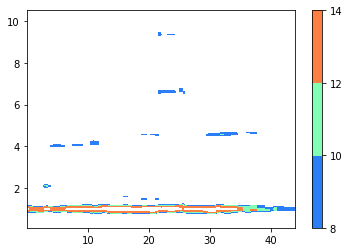

In [10]:
print(len(xt[:-w_num-1]),len(m_LS[0,:]),len(m_LS[:,0]),len(freq))
lev=np.arange(8,16,2)
plt.contourf(xt[:-w_num-1],freq[:-50],m_LS[:-50,:],levels=lev,cmap=cm.rainbow)

plt.colorbar()
plt.savefig("LS"+str(w_size).format("6.2f")+".png")

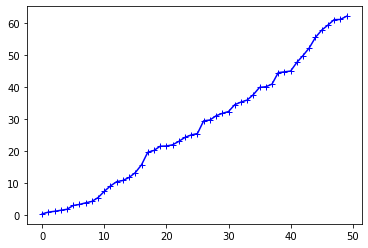

In [11]:
plt.plot(x,'b+-')